<a href="https://colab.research.google.com/github/tul17ii/Fold-Cross-Validation/blob/main/Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving easy_binary_dataset.csv to easy_binary_dataset.csv
### Manual Decision Tree Calculation ###
Total Entropy of the Dataset: 1.0000

--- Information Gain ---
Information Gain for feature 'a1': 0.0290
Information Gain for feature 'a2': 0.0290

'a1' is selected as the root node due to the highest IG.
--------------------------------------------------

### Decision Tree Model Creation Complete ###

--- Generated Decision Tree Visualization ---


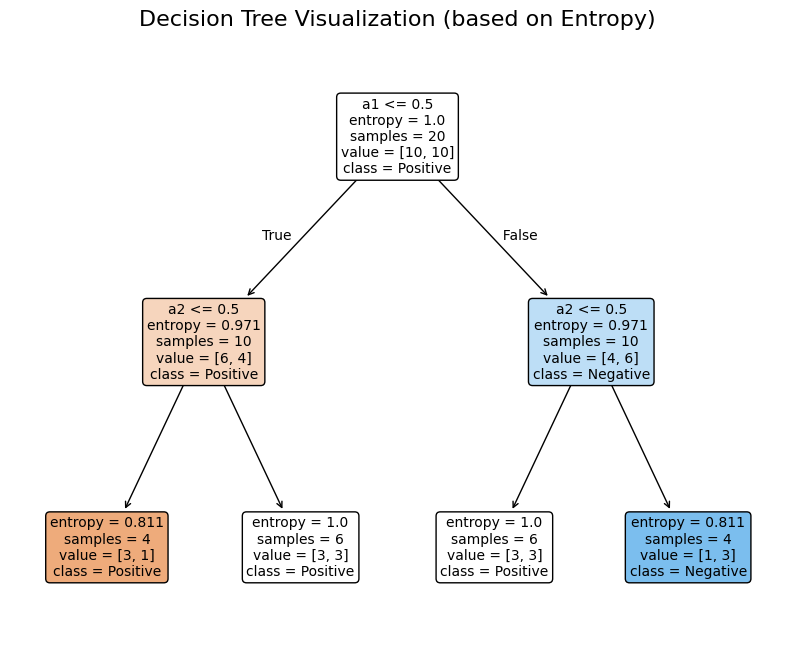

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from google.colab import files

# Step 1: Upload the CSV file
files.upload()

# Load the dataset from the CSV file
df = pd.read_csv('easy_binary_dataset.csv')

# Convert categorical data to a numerical format for the model
df['a1_numeric'] = df['a1'].map({'T': 1, 'F': 0})
df['a2_numeric'] = df['a2'].map({'T': 1, 'F': 0})
df['Classification_numeric'] = df['Classification'].map({'+': 1, '-': 0})

# Separate the features (X) and the target variable (y)
X = df[['a1_numeric', 'a2_numeric']]
y = df['Classification_numeric']
feature_names = ['a1', 'a2']

# --- Step 2: Entropy and Information Gain Calculation ---
def calculate_entropy(series):
    # Count the occurrences of each class in the series
    counts = np.bincount(series)
    # Calculate the probability of each class
    probabilities = counts / len(series)
    # Calculate the entropy using the formula: -sum(p * log2(p))
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

# 1. Calculate the total entropy of the entire dataset
total_entropy = calculate_entropy(y)

print("### Manual Decision Tree Calculation ###")
print(f"Total Entropy of the Dataset: {total_entropy:.4f}\n")

# 2. Calculate the Information Gain for each feature
information_gains = {}
for feature in X.columns:
    # Get the unique values for the current feature (e.g., 0 and 1)
    unique_values = X[feature].unique()
    weighted_entropy = 0

    # Calculate the weighted entropy for the feature
    for value in unique_values:
        subset_y = y[X[feature] == value]
        prob = len(subset_y) / len(y)
        weighted_entropy += prob * calculate_entropy(subset_y)

    # Information Gain = Total Entropy - Weighted Entropy
    ig = total_entropy - weighted_entropy
    # Store the result with the original feature name (e.g., 'a1')
    original_feature_name = feature.replace('_numeric', '')
    information_gains[original_feature_name] = ig

# Print the calculated Information Gain for each feature
print("--- Information Gain ---")
for feature, ig in information_gains.items():
    print(f"Information Gain for feature '{feature}': {ig:.4f}")

# Determine the root node based on the highest Information Gain
root_node = max(information_gains, key=information_gains.get)
print(f"\n'{root_node}' is selected as the root node due to the highest IG.")
print("-" * 50)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the entire dataset
dt_classifier.fit(X, y)
print("\n### Decision Tree Model Creation Complete ###\n")



print("--- Generated Decision Tree Visualization ---")
plt.figure(figsize=(10, 8))
plot_tree(
    dt_classifier,
    feature_names=feature_names,
    class_names=['Positive', 'Negative'],
    filled=True,      # Color the nodes to show majority class
    rounded=True,     # Use rounded corners for the node boxes
    fontsize=10
)
plt.title("Decision Tree Visualization (based on Entropy)", fontsize=16)
plt.show()

### Starting 5-Fold Cross-Validation ###

--- Fold 1 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
16        17              -  F  T           0           1   
18        19

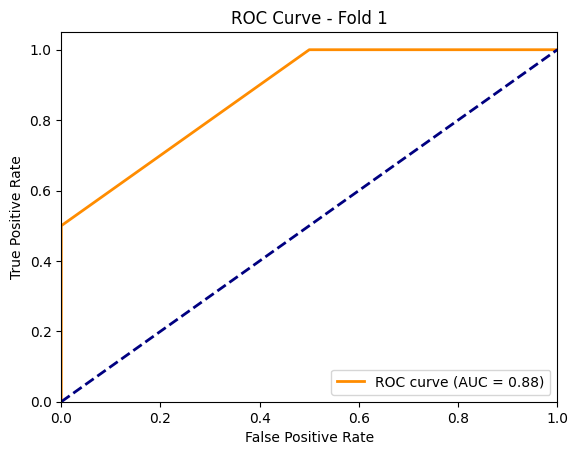

--------------------------------------------------
--- Fold 2 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
4          5              +  T  F           1           0   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


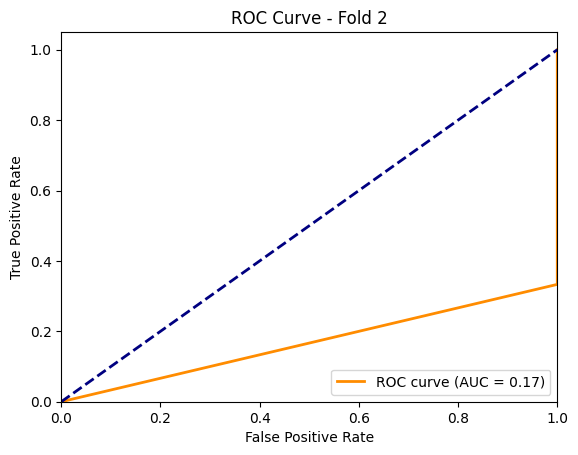

--------------------------------------------------
--- Fold 3 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
17 

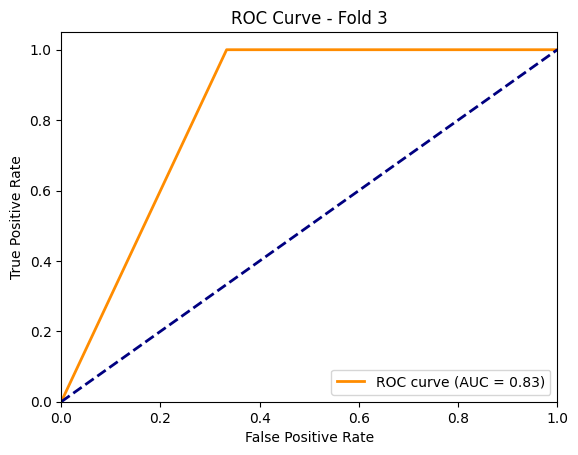

--------------------------------------------------
--- Fold 4 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17 

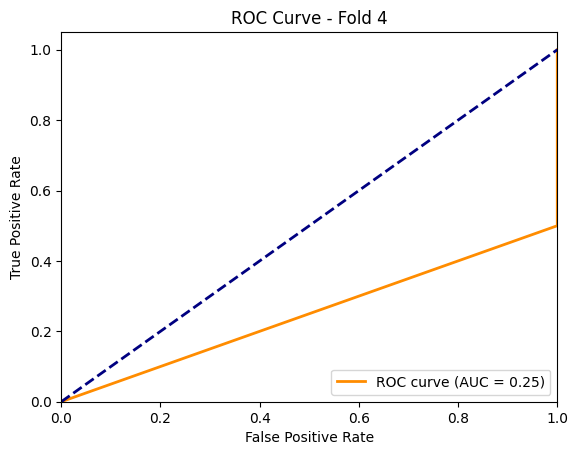

--------------------------------------------------
--- Fold 5 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

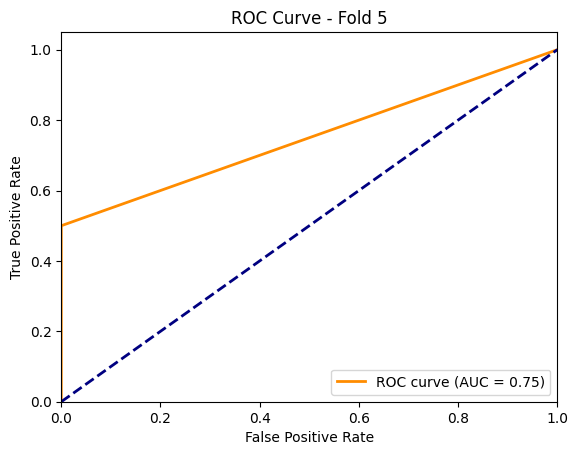

--------------------------------------------------

### Average Performance Across 5 Folds ###
Average Accuracy: 0.4500
Average Precision: 0.5167
Average Recall: 0.5000
Average F1-Score: 0.4267
Average Specificity: 0.6000
Average G-Mean: 0.2828
Average ROC AUC Score: 0.5750
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Successfully saved the performance matrix table to 'cross_validation_results.xlsx'

### Cross-Validation Process Complete ###


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset from the CSV file
df = pd.read_csv('easy_binary_dataset.csv')

# Convert categorical data to a numerical format for the model
df['a1_numeric'] = df['a1'].map({'T': 1, 'F': 0})
df['a2_numeric'] = df['a2'].map({'T': 1, 'F': 0})
df['Classification_numeric'] = df['Classification'].map({'+': 1, '-': 0})

# Separate the features (X) and the target variable (y)
X = df[['a1_numeric', 'a2_numeric']]
y = df['Classification_numeric']

# --- Step 1: 5-Fold Cross-Validation Setup ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []
gmean_scores = []

# --- Step 2: Loop through each fold ---
print("### Starting 5-Fold Cross-Validation ###\n")

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"--- Fold {fold + 1} ---")

    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the training and testing data for this fold
    print("\nTraining Data:")
    print(df.iloc[train_index])
    print("\nTesting Data:")
    print(df.iloc[test_index])

    # Create and train a new Decision Tree Classifier for this fold
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_test)
    y_prob = dt_classifier.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

    # --- Step 3: Calculate Performance Metrics for the fold ---

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Individual Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(roc_curve(y_test, y_prob)[0], roc_curve(y_test, y_prob)[1])

    # Calculate Specificity and G-Mean from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    gmean = np.sqrt(recall * specificity)

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    specificity_scores.append(specificity)
    gmean_scores.append(gmean)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # --- Step 4: Plot ROC Curve for the fold ---
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.savefig(f'roc_curve_fold_{fold + 1}.png')
    plt.show() # Display the plot directly in the output

    print("-" * 50)

# --- Step 5: Calculate and display average performance metrics ---
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_roc_auc = np.mean(roc_auc_scores)
avg_specificity = np.mean(specificity_scores)
avg_gmean = np.mean(gmean_scores)

print("\n### Average Performance Across 5 Folds ###")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average G-Mean: {avg_gmean:.4f}")
print(f"Average ROC AUC Score: {avg_roc_auc:.4f}")
print("-" * 50)

# --- Step 6: Create and save the summary table to an Excel sheet ---
data = {
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Accuracy': accuracy_scores + [avg_accuracy],
    'Precision': precision_scores + [avg_precision],
    'Recall': recall_scores + [avg_recall],
    'F1-Score': f1_scores + [avg_f1],
    'Specificity': specificity_scores + [avg_specificity],
    'G-Mean': gmean_scores + [avg_gmean],
    'ROC AUC Score': roc_auc_scores + [avg_roc_auc]
}

summary_df = pd.DataFrame(data)
excel_filename = 'cross_validation_results.xlsx'
summary_df.to_excel(excel_filename, index=False)

# Add the file download command
files.download(excel_filename)

print(f"\nSuccessfully saved the performance matrix table to '{excel_filename}'")
print("\n### Cross-Validation Process Complete ###")

### Starting 5-Fold Stratified Cross-Validation ###

--- Fold 1 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
2          3              +  T  T           1           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


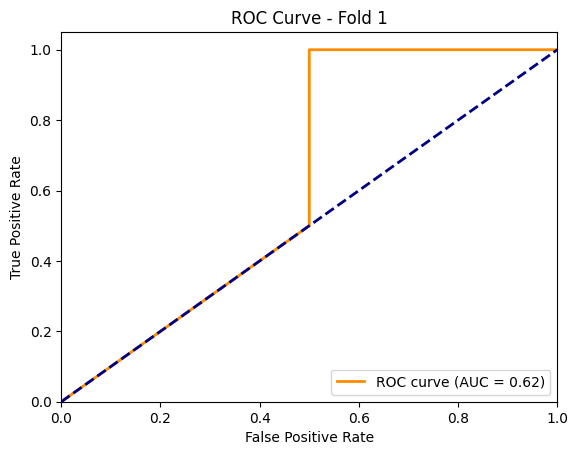

--------------------------------------------------
--- Fold 2 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


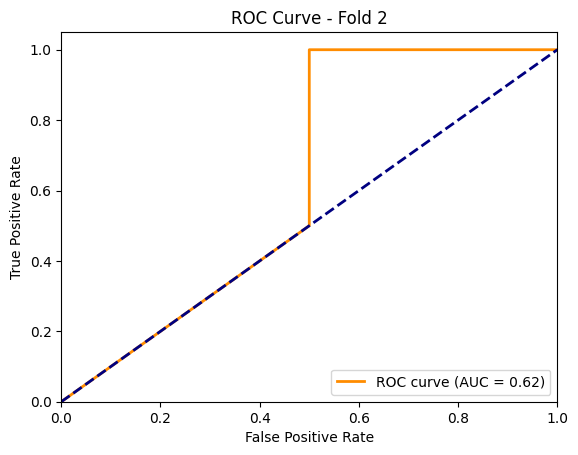

--------------------------------------------------
--- Fold 3 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
14        15              -  F  F           0           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

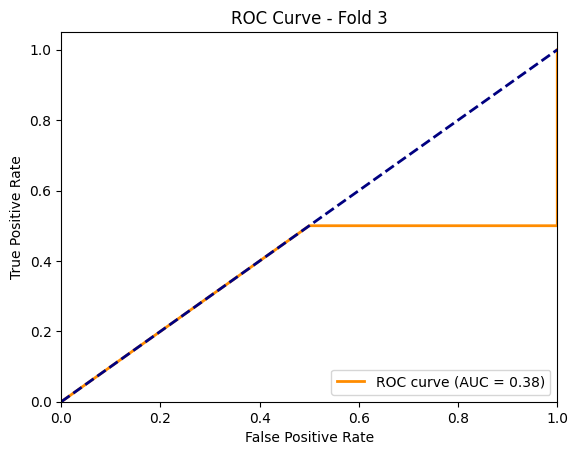

--------------------------------------------------
--- Fold 4 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
12        13              -  F  T           0           1   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
17 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


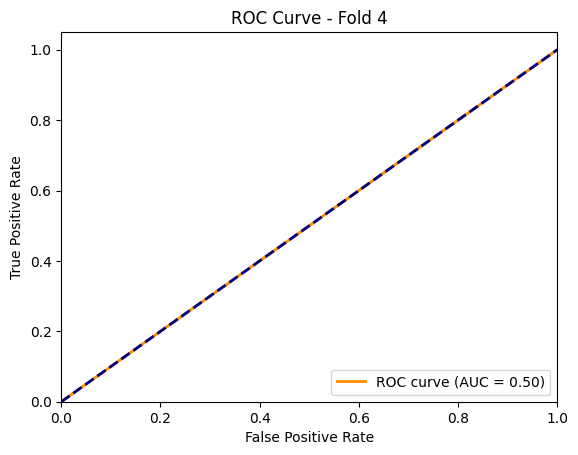

--------------------------------------------------
--- Fold 5 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              -  F  F           0           0   
11        12              -  T  F           1           0   
13        14              -  T  T           1           1   
14        15              -  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
18 

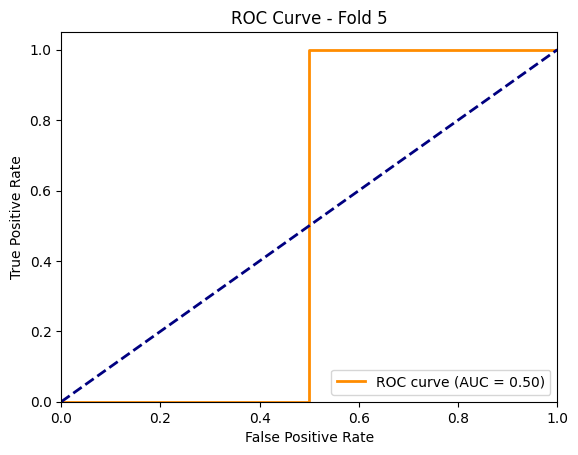

--------------------------------------------------

### Average Performance Across 5 Folds ###
Average Accuracy: 0.4000
Average Precision: 0.0667
Average Recall: 0.1000
Average F1-Score: 0.0800
Average Specificity: 0.7000
Average G-Mean: 0.0000
Average ROC AUC Score: 0.5250
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Successfully saved the performance matrix table to 'stratified_cross_validation_results.xlsx'

### Cross-Validation Process Complete ###


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset from the CSV file
df = pd.read_csv('easy_binary_dataset.csv')

# Convert categorical data to a numerical format for the model
df['a1_numeric'] = df['a1'].map({'T': 1, 'F': 0})
df['a2_numeric'] = df['a2'].map({'T': 1, 'F': 0})
df['Classification_numeric'] = df['Classification'].map({'+': 1, '-': 0})

# Separate the features (X) and the target variable (y)
X = df[['a1_numeric', 'a2_numeric']]
y = df['Classification_numeric']

# --- Step 1: 5-Fold Stratified Cross-Validation Setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []
gmean_scores = []

# --- Step 2: Loop through each fold ---
print("### Starting 5-Fold Stratified Cross-Validation ###\n")

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold + 1} ---")

    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the training and testing data for this fold
    print("\nTraining Data:")
    print(df.iloc[train_index])
    print("\nTesting Data:")
    print(df.iloc[test_index])

    # Create and train a new Decision Tree Classifier for this fold
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_test)
    y_prob = dt_classifier.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

    # --- Step 3: Calculate Performance Metrics for the fold ---

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Individual Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(roc_curve(y_test, y_prob)[0], roc_curve(y_test, y_prob)[1])

    # Calculate Specificity and G-Mean from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    gmean = np.sqrt(recall * specificity)

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    specificity_scores.append(specificity)
    gmean_scores.append(gmean)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # --- Step 4: Plot ROC Curve for the fold ---
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.savefig(f'stratified_roc_curve_fold_{fold + 1}.png')
    plt.show() # Display the plot directly in the output

    print("-" * 50)

# --- Step 5: Calculate and display average performance metrics ---
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_roc_auc = np.mean(roc_auc_scores)
avg_specificity = np.mean(specificity_scores)
avg_gmean = np.mean(gmean_scores)

print("\n### Average Performance Across 5 Folds ###")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average G-Mean: {avg_gmean:.4f}")
print(f"Average ROC AUC Score: {avg_roc_auc:.4f}")
print("-" * 50)

# --- Step 6: Create and save the summary table to an Excel sheet ---
data = {
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Accuracy': accuracy_scores + [avg_accuracy],
    'Precision': precision_scores + [avg_precision],
    'Recall': recall_scores + [avg_recall],
    'F1-Score': f1_scores + [avg_f1],
    'Specificity': specificity_scores + [avg_specificity],
    'G-Mean': gmean_scores + [avg_gmean],
    'ROC AUC Score': roc_auc_scores + [avg_roc_auc]
}

summary_df = pd.DataFrame(data)
excel_filename = 'stratified_cross_validation_results.xlsx'
summary_df.to_excel(excel_filename, index=False)

# Add the file download command
files.download(excel_filename)

print(f"\nSuccessfully saved the performance matrix table to '{excel_filename}'")
print("\n### Cross-Validation Process Complete ###")

Saving DOC-20250825-WA0028.csv to DOC-20250825-WA0028 (4).csv
### Starting 5-Fold Cross-Validation ###

--- Fold 1 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
14        15              +  F  F           0           0   
16        1

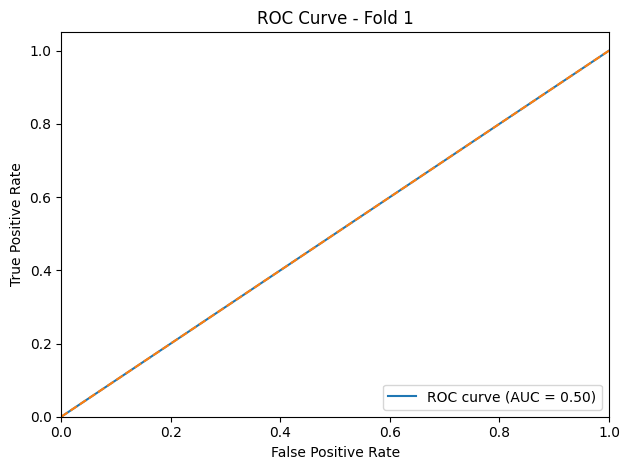

--------------------------------------------------
--- Fold 2 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
4          5              +  T  F           1           0   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
14        15              +  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


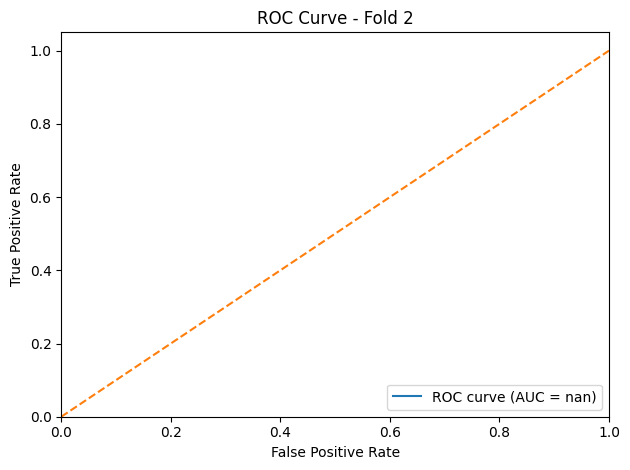

--------------------------------------------------
--- Fold 3 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
14        15              +  F  F           0           0   
15        16              -  T  F           1           0   
17 

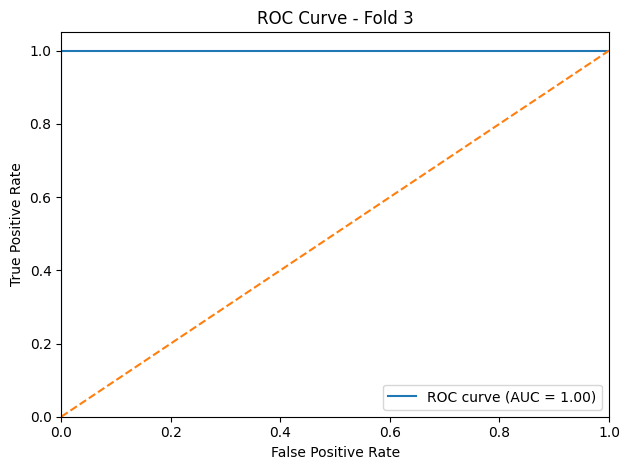

--------------------------------------------------
--- Fold 4 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
13        14              +  T  T           1           1   
14        15              +  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17 

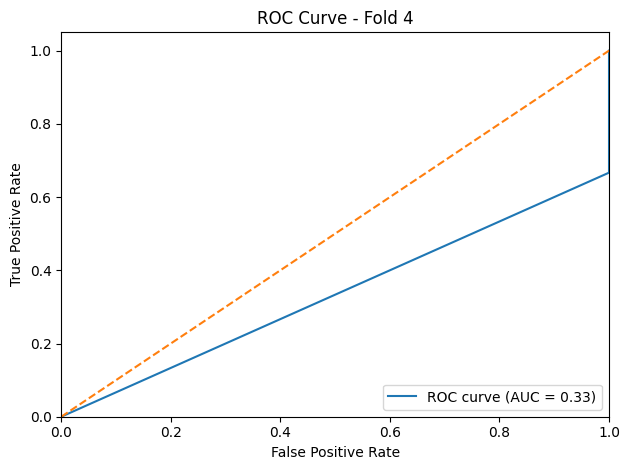

--------------------------------------------------
--- Fold 5 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


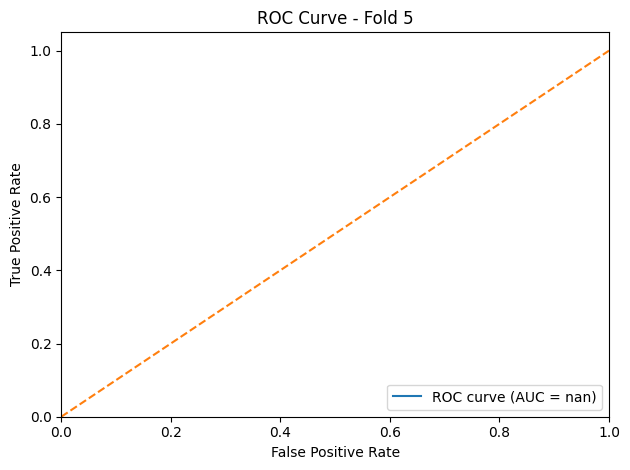

--------------------------------------------------

### Average Performance Across 5 Folds ###
Average Accuracy: 0.4000
Average Precision: 0.5500
Average Recall: 0.6500
Average F1-Score: 0.5181
Average Specificity: 0.0000
Average G-Mean: 0.0000
Average ROC AUC Score: nan
--------------------------------------------------
File 'cross_validation_results.xlsx' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


### Cross-Validation Process Complete ###


In [ ]:
# -*- coding: utf-8 -*-
# 5-Fold Cross-Validation with Decision Tree and Excel export
# This code ensures the Excel file is generated and can be downloaded in Google Colab

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import os

# --- Step 0: Load dataset ---
# Use the correct uploaded file path
from google.colab import files

# Step 1: Upload the CSV file
files.upload()  # Uncomment this if you're running this on Google Colab
csv_path = 'DOC-20250825-WA0028.csv'  # Ensure you use the correct path to the uploaded file

df = pd.read_csv(csv_path)

# --- Step 0.1: Convert categorical to numeric ---
df['a1_numeric'] = df['a1'].map({'T': 1, 'F': 0})
df['a2_numeric'] = df['a2'].map({'T': 1, 'F': 0})
df['Classification_numeric'] = df['Classification'].map({'+': 1, '-': 0})

# Drop rows that failed mapping (if any)
df = df.dropna(subset=['a1_numeric', 'a2_numeric', 'Classification_numeric']).copy()

# --- Step 0.2: Features & Target ---
X = df[['a1_numeric', 'a2_numeric']]
y = df['Classification_numeric'].astype(int)

# --- Step 1: 5-Fold Cross-Validation Setup ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []
gmean_scores = []

print("### Starting 5-Fold Cross-Validation ###\n")

# --- Step 2: Loop through each fold ---
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    print(f"--- Fold {fold} ---")

    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Show fold data
    print("\nTraining Data:")
    print(df.iloc[train_index])
    print("\nTesting Data:")
    print(df.iloc[test_index])

    # --- Model ---
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # --- Predictions ---
    y_pred = dt_classifier.predict(X_test)
    y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # for ROC

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("\nConfusion Matrix:")
    print(cm)

    # --- Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Calculate Specificity and G-Mean from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    gmean = np.sqrt(recall * specificity)

    # Handle the case where roc_auc_score might fail
    try:
        roc_auc = roc_auc_score(y_test, y_prob)
    except ValueError:
        # This will occur if a fold has only a single class
        roc_auc = 0.5  # A default value indicating no discriminative power

    # Store metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    specificity_scores.append(specificity)
    gmean_scores.append(gmean)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # --- Step 4: Plot ROC Curve for the fold ---
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold}')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f'roc_curve_fold_{fold}.png')
    plt.show()

    print("-" * 50)

# --- Step 5: Calculate and display average performance metrics ---
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_roc_auc = np.mean(roc_auc_scores)
avg_specificity = np.mean(specificity_scores)
avg_gmean = np.mean(gmean_scores)

print("\n### Average Performance Across 5 Folds ###")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average G-Mean: {avg_gmean:.4f}")
print(f"Average ROC AUC Score: {avg_roc_auc:.4f}")
print("-" * 50)

# --- Step 6: Create and save the summary table to an Excel sheet ---
summary_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Accuracy': accuracy_scores + [avg_accuracy],
    'Precision': precision_scores + [avg_precision],
    'Recall': recall_scores + [avg_recall],
    'F1-Score': f1_scores + [avg_f1],
    'Specificity': specificity_scores + [avg_specificity],
    'G-Mean': gmean_scores + [avg_gmean],
    'ROC AUC Score': roc_auc_scores + [avg_roc_auc]
})

# Excel filename
excel_filename = 'cross_validation_results.xlsx'
summary_df.to_excel(excel_filename, index=False)

# Check if the file exists before attempting to download
if os.path.exists(excel_filename):
    print(f"File '{excel_filename}' created successfully.")
    files.download(excel_filename)  # Triggers the download
else:
    print(f"Failed to create the file '{excel_filename}'.")

print("\n### Cross-Validation Process Complete ###")


### Dataset Class Distribution ###
Classification
+    15
-     5
Name: count, dtype: int64
--------------------------------------------------

### Starting 5-Fold Stratified Cross-Validation ###

--- Fold 1 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
14        15              +  F  F       

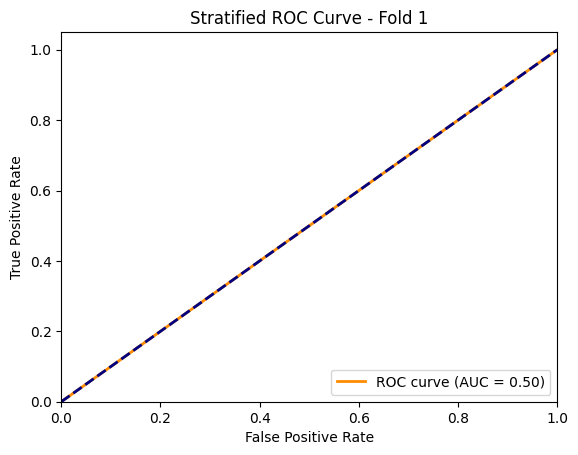

--------------------------------------------------
--- Fold 2 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
14        15              +  F  F           0           0   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17 

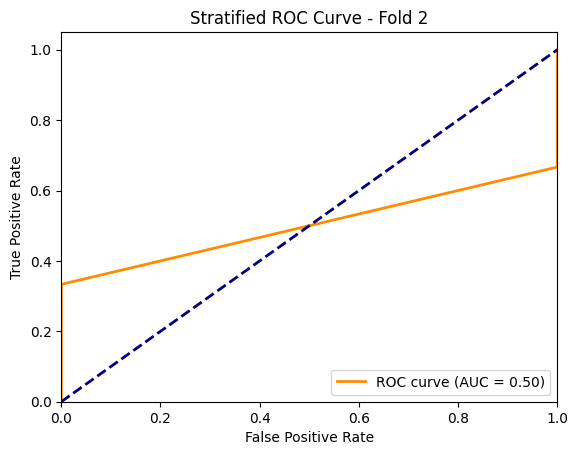

--------------------------------------------------
--- Fold 3 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
11        12              +  T  F           1           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
15        16              -  T  F           1           0   
16        17              -  F  T           0           1   
17 

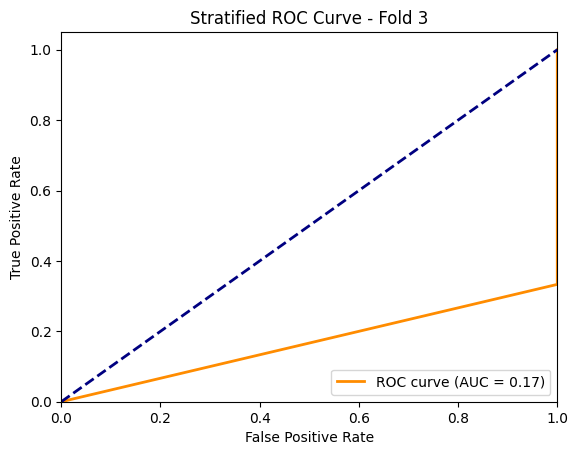

--------------------------------------------------
--- Fold 4 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
2          3              +  T  T           1           1   
3          4              +  F  T           0           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
8          9              +  T  F           1           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
12        13              +  F  T           0           1   
13        14              +  T  T           1           1   
14        15              +  F  F           0           0   
15        16              -  T  F           1           0   
17        18              -  F  F           0           0   
18 

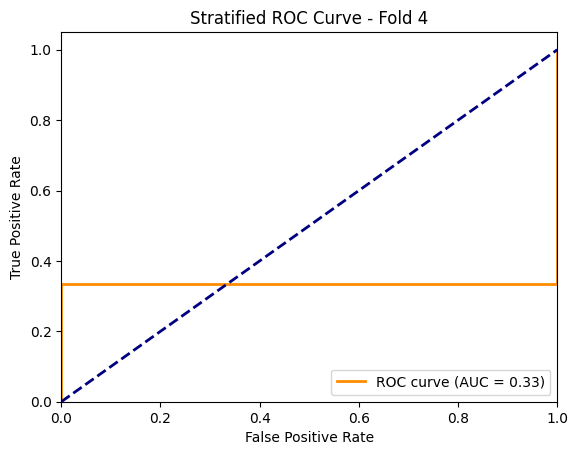

--------------------------------------------------
--- Fold 5 ---

Training Data:
    Instance Classification a1 a2  a1_numeric  a2_numeric  \
0          1              +  T  T           1           1   
1          2              +  T  F           1           0   
2          3              +  T  T           1           1   
4          5              +  T  F           1           0   
5          6              +  F  T           0           1   
6          7              +  T  T           1           1   
7          8              +  F  F           0           0   
9         10              +  F  T           0           1   
10        11              +  F  F           0           0   
11        12              +  T  F           1           0   
13        14              +  T  T           1           1   
14        15              +  F  F           0           0   
16        17              -  F  T           0           1   
17        18              -  F  F           0           0   
18 

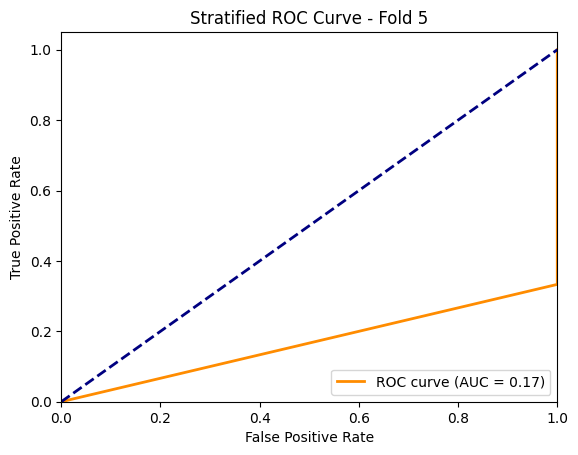

--------------------------------------------------

### Average Performance Across 5 Stratified Folds ###
Average Accuracy: 0.4500
Average Precision: 0.6000
Average Recall: 0.6000
Average F1-Score: 0.5829
Average Specificity: 0.0000
Average G-Mean: 0.0000
Average ROC AUC Score: 0.3333
--------------------------------------------------
File 'stratified_cross_validation_results.xlsx' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


### Stratified Cross-Validation Complete ###


In [ ]:
# -*- coding: utf-8 -*-
# 5-Fold Stratified Cross-Validation with Decision Tree and Excel export
# This code ensures the Excel file is generated and can be downloaded in Google Colab

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import os
from google.colab import files

# --- Step 0: Load the new dataset ---
file_path = 'DOC-20250825-WA0028.csv'
df = pd.read_csv(file_path)

# --- Check the dataset imbalance ---
print("### Dataset Class Distribution ###")
print(df['Classification'].value_counts())
print("-" * 50)

# --- Step 0.1: Convert categorical to numeric ---
df['a1_numeric'] = df['a1'].map({'T': 1, 'F': 0})
df['a2_numeric'] = df['a2'].map({'T': 1, 'F': 0})
df['Classification_numeric'] = df['Classification'].map({'+': 1, '-': 0})

# Features & Target
X = df[['a1_numeric', 'a2_numeric']]
y = df['Classification_numeric'].astype(int)

# --- Step 1: Stratified 5-Fold Cross-Validation Setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
specificity_scores = []
gmean_scores = []

print("\n### Starting 5-Fold Stratified Cross-Validation ###\n")

# --- Step 2: Loop through each fold ---
for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    print(f"--- Fold {fold} ---")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the training and testing data for this fold
    print("\nTraining Data:")
    print(df.iloc[train_index])
    print("\nTesting Data:")
    print(df.iloc[test_index])

    # Create and train a new Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_classifier.predict(X_test)
    y_prob = dt_classifier.predict_proba(X_test)[:, 1]

    # --- Step 3: Calculate Performance Metrics for the fold ---
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("\nConfusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    gmean = np.sqrt(recall * specificity)

    # Store
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    specificity_scores.append(specificity)
    gmean_scores.append(gmean)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G-Mean: {gmean:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # --- Step 4: Plot ROC Curve for the fold ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Stratified ROC Curve - Fold {fold}')
    plt.legend(loc="lower right")
    plt.savefig(f'stratified_kfold_roc_curve_fold_{fold}.png')
    plt.show()

    print("-" * 50)

# --- Step 5: Calculate and display average performance metrics ---
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_roc_auc = np.mean(roc_auc_scores)
avg_specificity = np.mean(specificity_scores)
avg_gmean = np.mean(gmean_scores)

print("\n### Average Performance Across 5 Stratified Folds ###")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average G-Mean: {avg_gmean:.4f}")
print(f"Average ROC AUC Score: {avg_roc_auc:.4f}")
print("-" * 50)

# --- Step 6: Create and save the summary table to an Excel sheet ---
summary_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Accuracy': accuracy_scores + [avg_accuracy],
    'Precision': precision_scores + [avg_precision],
    'Recall': recall_scores + [avg_recall],
    'F1-Score': f1_scores + [avg_f1],
    'Specificity': specificity_scores + [avg_specificity],
    'G-Mean': gmean_scores + [avg_gmean],
    'ROC AUC Score': roc_auc_scores + [avg_roc_auc]
})

# Define the Excel filename
excel_filename = 'stratified_cross_validation_results.xlsx'

# Save the results to Excel
summary_df.to_excel(excel_filename, index=False)

# Check if the file exists before attempting to download
if os.path.exists(excel_filename):
    print(f"File '{excel_filename}' created successfully.")
    files.download(excel_filename)  # Triggers the download
else:
    print(f"Failed to create the file '{excel_filename}'.")

print("\n### Stratified Cross-Validation Complete ###")
